In [1]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())

E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


In [2]:
#Array packages
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.ticker as ticker

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy


C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 1_ALL 

### 1. P VS Q with c=RE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

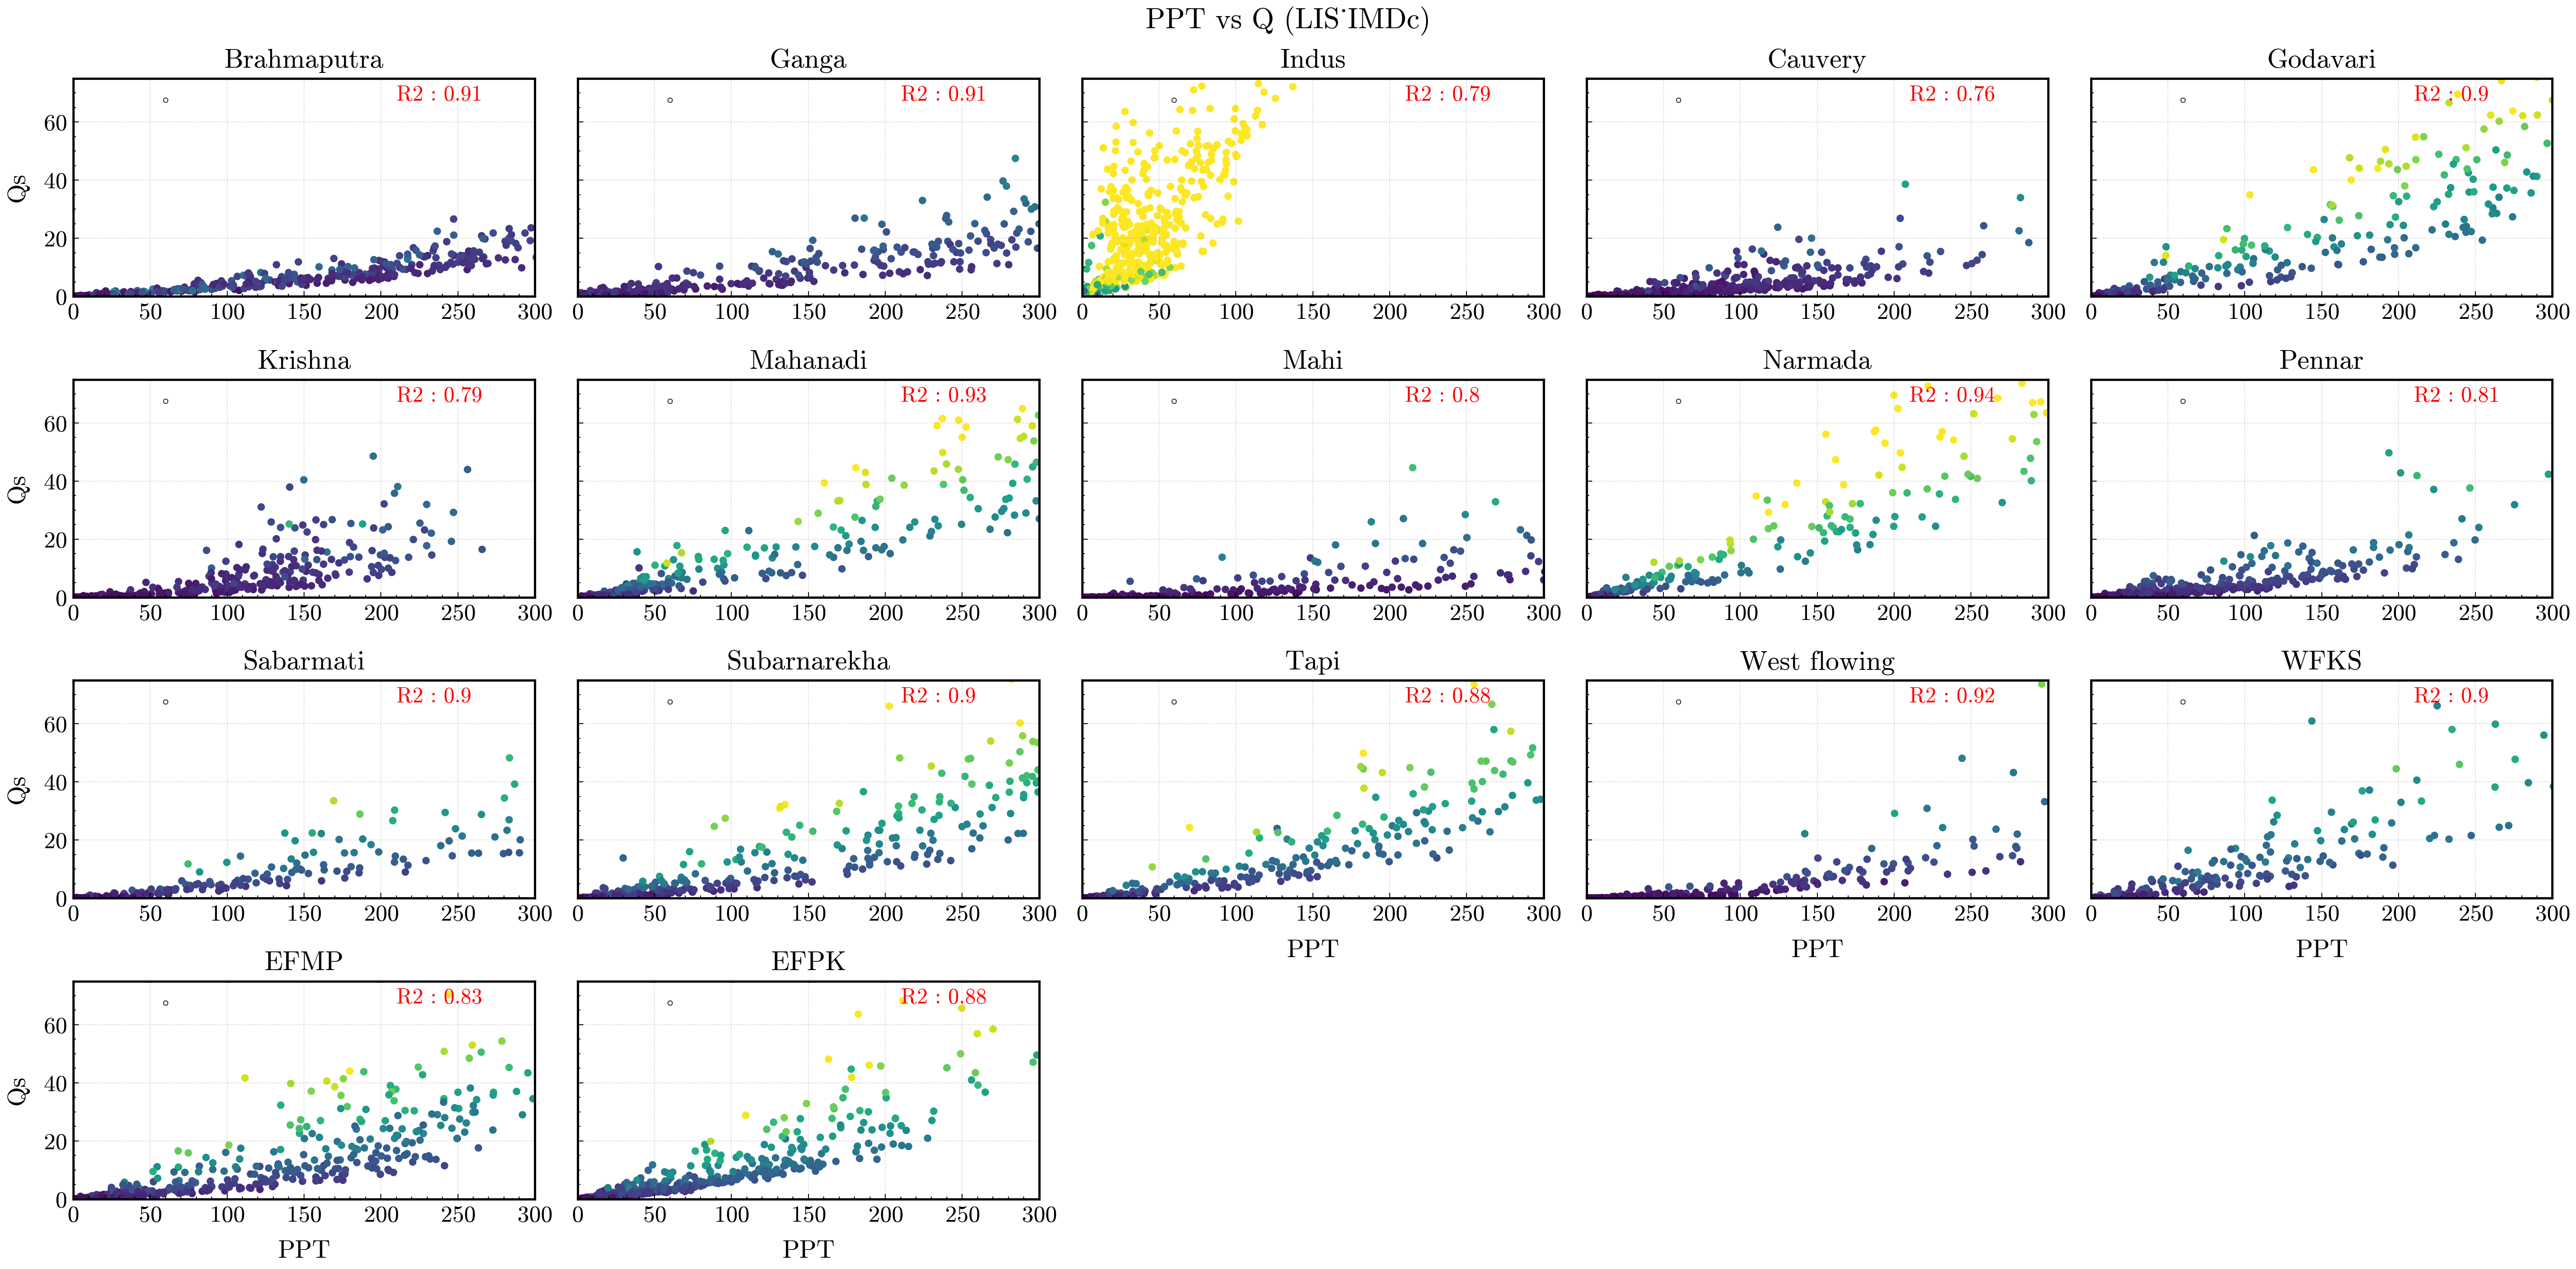

In [62]:
import matplotlib.ticker as ticker
mdl=4
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]
lsm = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_all.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=lsm.region.values


fig, ax = plt.subplots(4,5,figsize=(20,10), facecolor='white', dpi=300,sharey=True)
ax=ax.flatten()


var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
var1=['PPT','ET','Qs','RE','RE_clean']
ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']


for i in range(17):
        
    import scienceplots
    plt.style.use(['science','no-latex','bright'])

    ppt=lsm['TotalPrecip_tavg'].isel(region=i)
    q=lsm['Qs_tavg'].isel(region=i)

    [x.set_linewidth(1.25) for x in ax[i].spines.values()]
    ax[i].grid(True, color= 'grey', alpha=0.4, linestyle='dotted')
 
    
    ax[i].scatter(ppt, q, c=lsm['RE_cleaned'].isel(region=i), cmap='viridis',vmin=0, vmax=0.2, alpha=1, s=10)

    ax[i].set_xlim(0,300)
    ax[i].set_ylim(0,75)


    #ax[i].set_xticklabels([]);ax[2].set_xlabel('i')

    [ax[i].set_ylabel('Qs',fontsize=15,labelpad=8, weight='bold') for i in [0,5,10,15]]
    [ax[i].set_xlabel('PPT',fontsize=15,labelpad=8, weight='bold') for i in [12,13,14,15,16,17]]

    #[ax[i].set_xticklabels(ax[i].get_xticks(), fontsize=12) for i in  [12,13,14,15,16,17]]
    #[ax[i].set_yticklabels(ax[i].get_yticks(), fontsize=12) for i in [0,5,10,15]]


    ax[i].xaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=13) 
    ax[i].yaxis.set_tick_params(which='both', left=True, right=False,labelsize=13) 
    
    ax[i].text(0.7, 0.97,f"R2 : {np.corrcoef(ppt,q)[0,1].round(2)} ", fontsize=12, color='red',
         ha='left', va='top', transform=ax[i].transAxes)
    
    
    ax[i].set_title(f'{basin[i]}', fontsize=15,weight='bold')
    
    lgnd=ax[i].legend(loc='center', ncol=2,fontsize=6, bbox_to_anchor=(0.2, 0.90),frameon=True, borderpad=0.2, edgecolor='black')
    frame = lgnd.get_frame()
    frame.set_linewidth(0.5)
    fig.suptitle(f'PPT vs Q ({model[mdl]})', fontsize=16,fontweight='bold')


[ax[i].axis('off') for i in range(17, 20)]

plt.tight_layout()
plt.savefig(f'1_Preliminary checks/output/3_PQcurve/PQCURVE_re{model[mdl]}.png',dpi=300)
plt.show()

### 2.PQ curve with c=time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

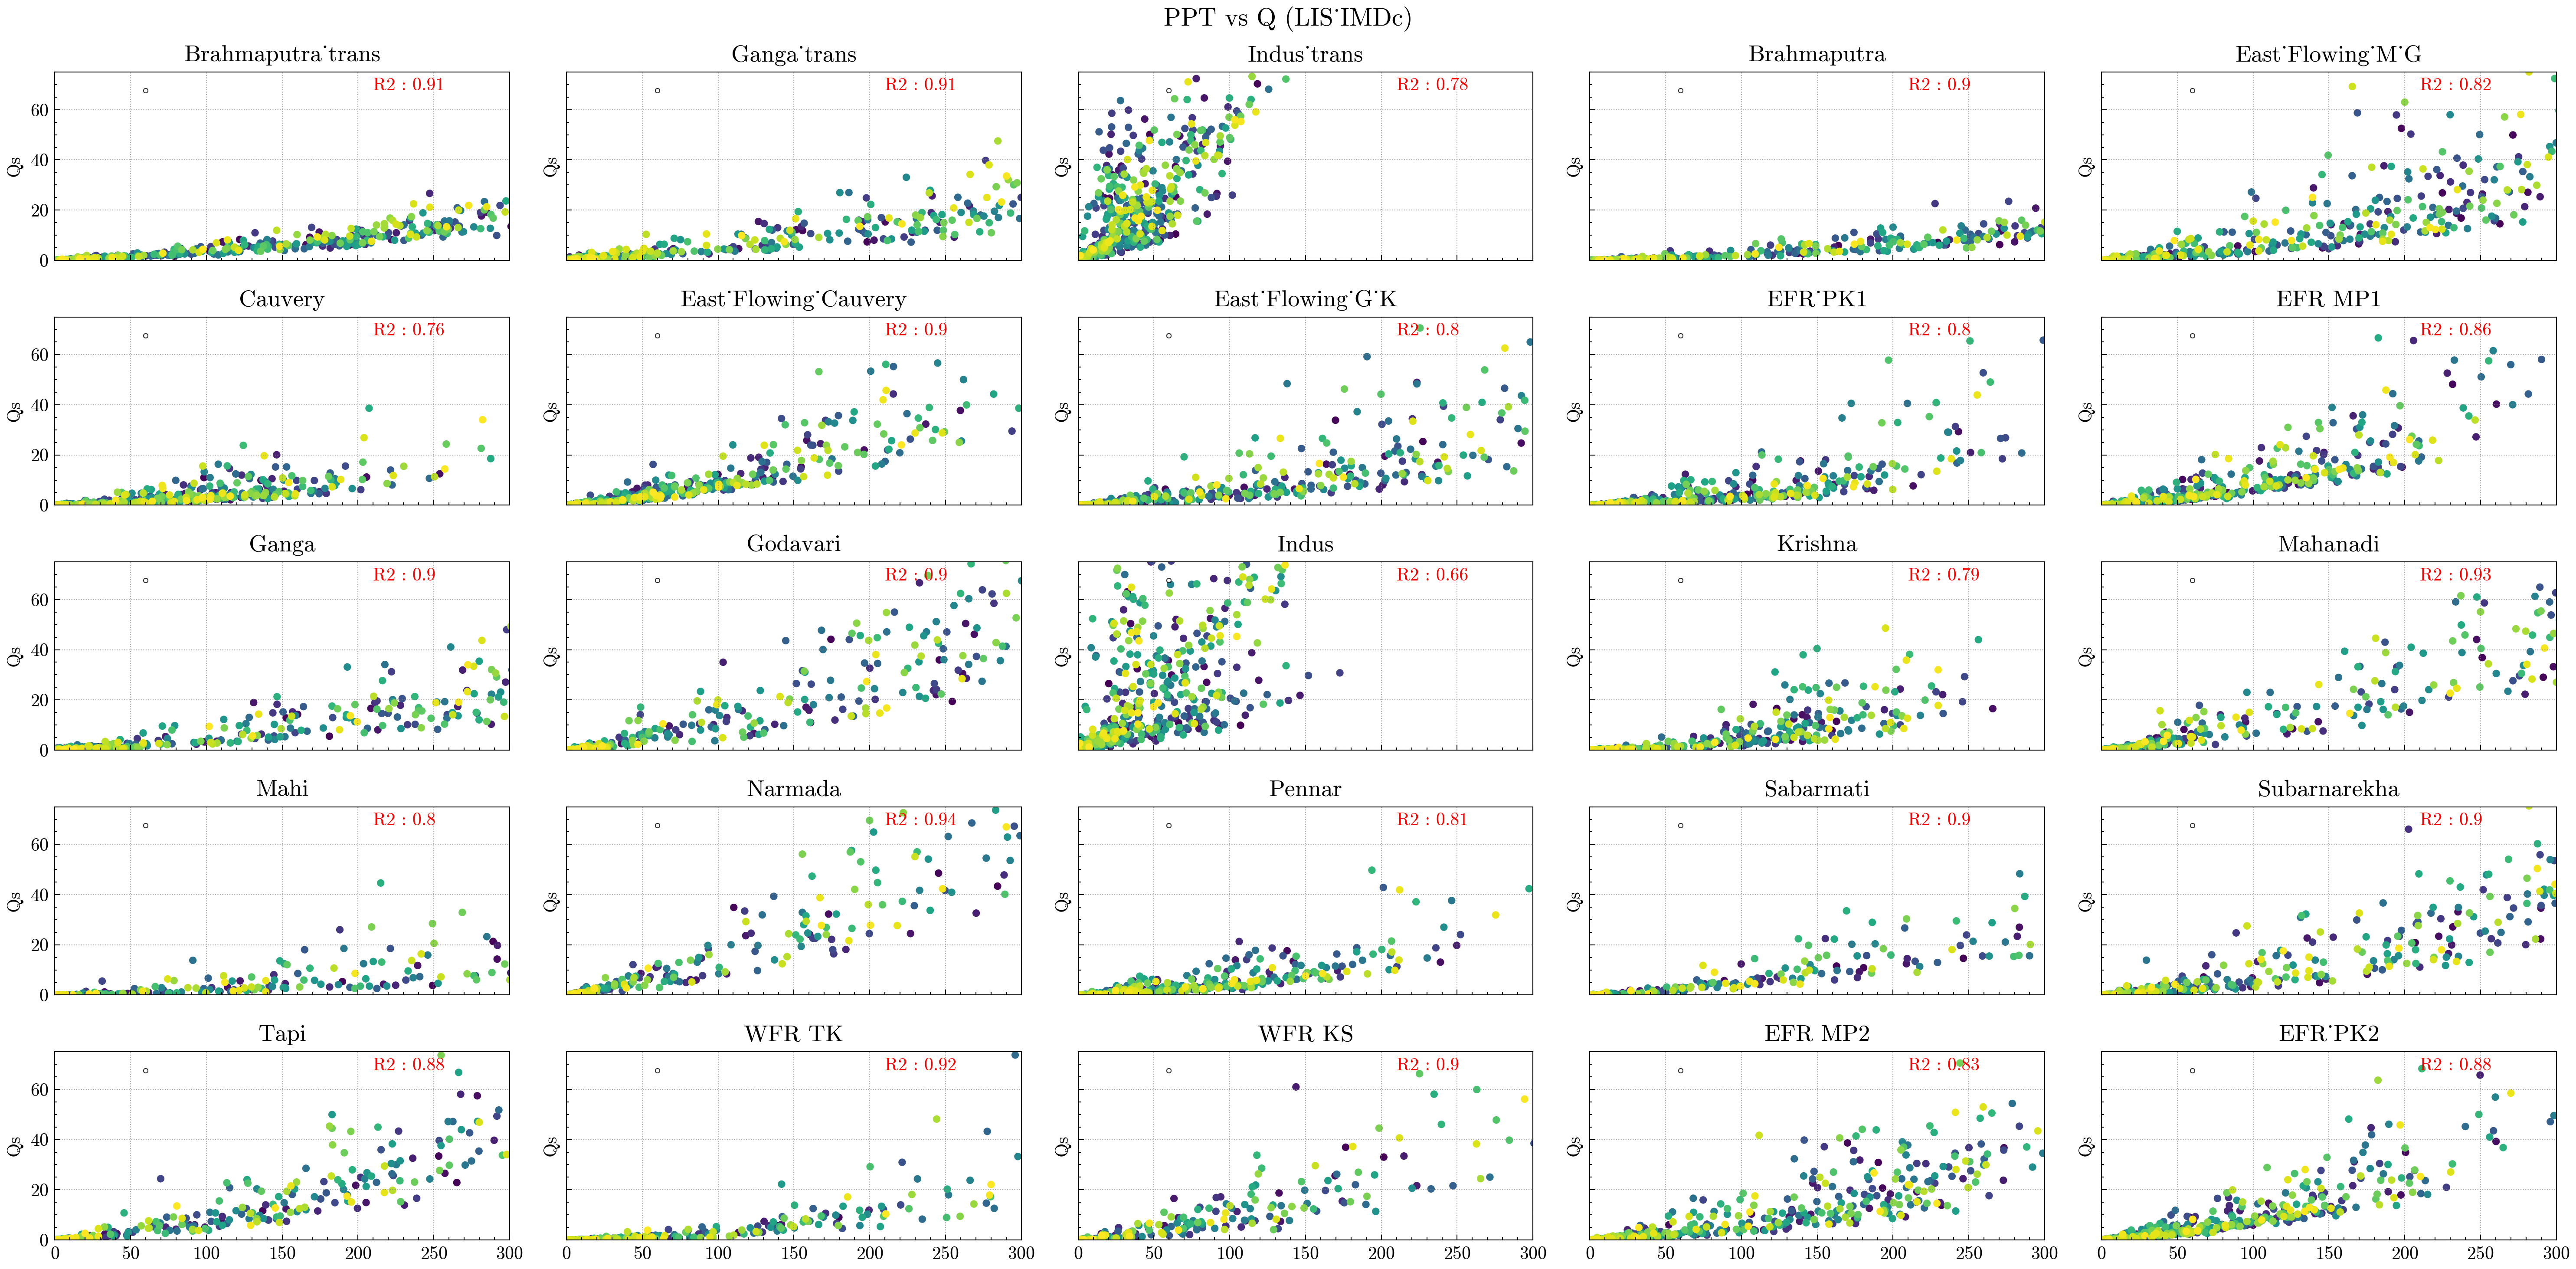

In [22]:
mdl=4
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]
lsm = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_all.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=lsm.region.values


fig, ax = plt.subplots(5,5,figsize=(20,10), facecolor='white', dpi=300,sharex=True, sharey=True)
ax=ax.flatten()


var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
var1=['PPT','ET','Qs','RE','RE_clean']
ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']


for i in range(25):
        
    import scienceplots
    plt.style.use(['science','no-latex','bright'])

    #np.arange(0,len(A['year']),1)

    ppt=lsm['TotalPrecip_tavg'].isel(region=i)
    q=lsm['Qs_tavg'].isel(region=i)
    tim=np.arange(0,504)
    
    lw=1;al=1
    
    ax[i].scatter(ppt, q, c=tim, cmap='viridis',vmin=0, vmax=504, alpha=al, s=10)

    ax[i].set_xlim(0,300)
    ax[i].set_ylim(0,75)

    #ax[i].set_xlabel('PPT')
    ax[i].set_ylabel('Qs')
    
    #
    ax[i].grid(True, color= 'grey', alpha=0.7, linestyle='dotted')
    

    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    ax[i].xaxis.set_tick_params(which='both', bottom=True, top=False)
    ax[i].yaxis.set_tick_params(which='both', left=True, right=False)
    
    ax[i].text(0.7, 0.97,f"R2 : {np.corrcoef(ppt,q)[0,1].round(2)} ", fontsize=10, color='red',
         ha='left', va='top', transform=ax[i].transAxes)
    
    #ax[i].set_xlabel('$\mathbf{Year}$', fontsize=14)
    #ax[i].set_ylabel('RE', fontsize=14,labelpad=8, weight='bold')
    ax[i].set_title(f'{basin[i]}', fontsize=13)
    
    lgnd=ax[i].legend(loc='center', ncol=2,fontsize=6, bbox_to_anchor=(0.2, 0.90),frameon=True, borderpad=0.2, edgecolor='black')
    frame = lgnd.get_frame()
    frame.set_linewidth(0.5)
    fig.suptitle(f'PPT vs Q ({model[mdl]})', fontsize=14,fontweight='bold')

plt.tight_layout()
plt.savefig(f'1_Preliminary checks/output/3_PQcurve/PQCURVE_time{model[mdl]}.png',dpi=300)
plt.show()

### 3_PQcurve c=shift

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

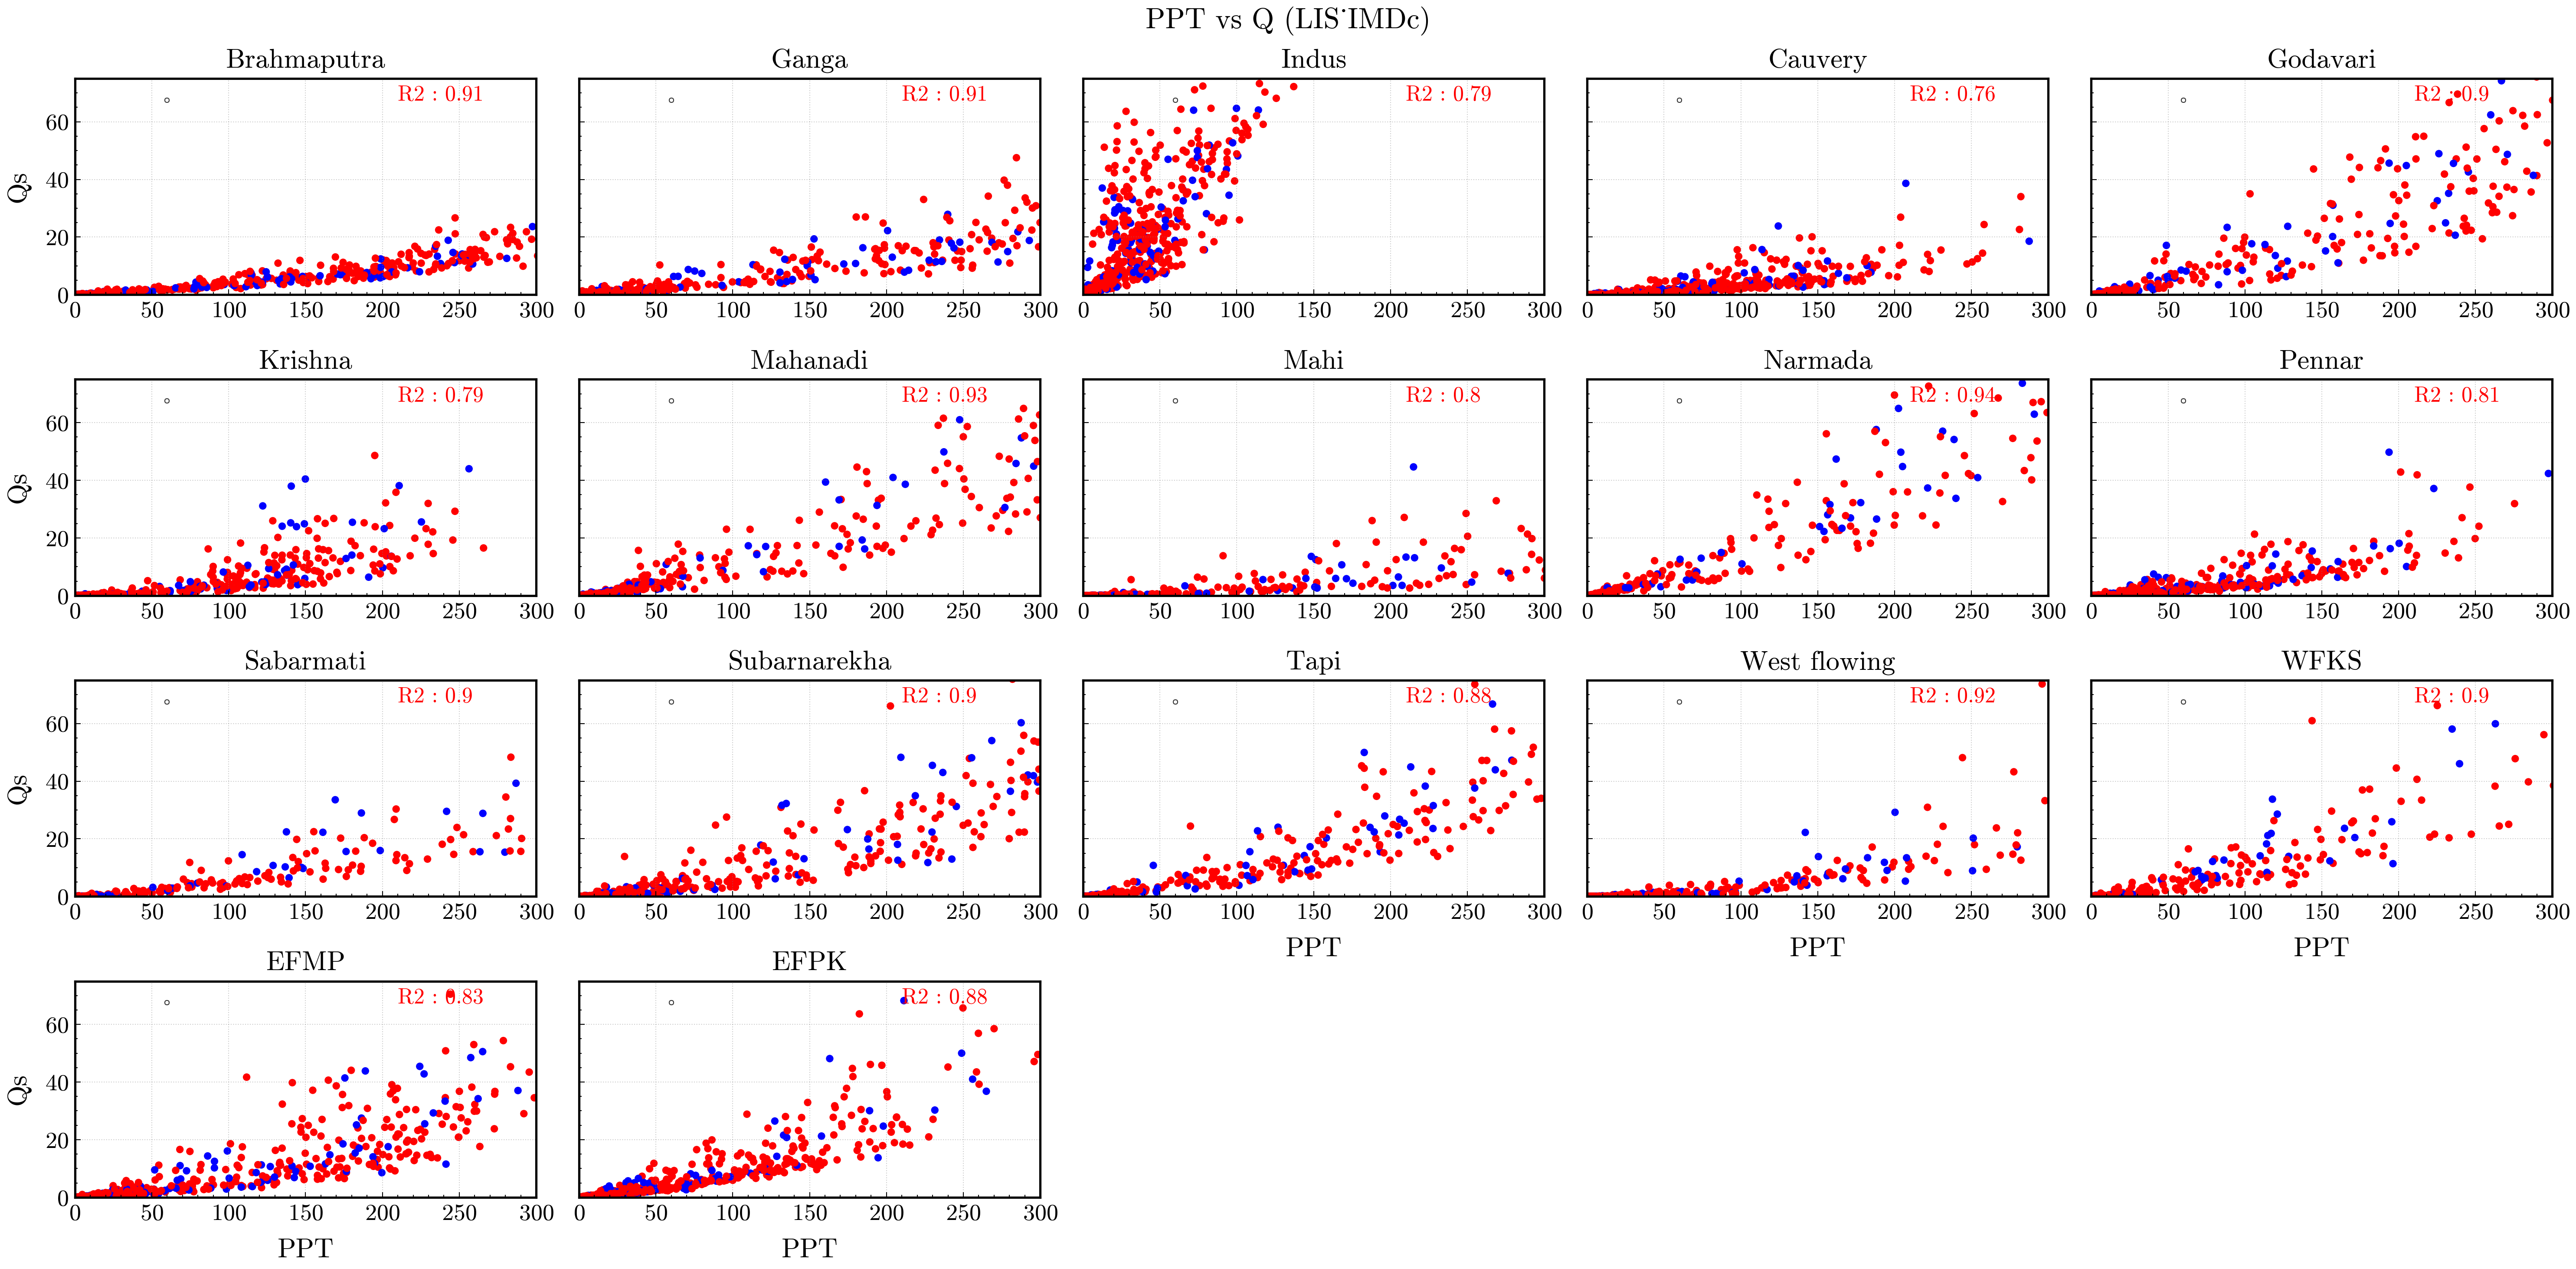

In [79]:
import matplotlib.ticker as ticker
mdl=4
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]
lsm = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_all.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=lsm.region.values


fig, ax = plt.subplots(4,5,figsize=(20,10), facecolor='white', dpi=300,sharey=True)
ax=ax.flatten()


var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
var1=['PPT','ET','Qs','RE','RE_clean']
ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']


for i in range(17):
        
    import scienceplots
    plt.style.use(['science','no-latex','bright'])

    ppt=lsm['TotalPrecip_tavg'].isel(region=i)
    q=lsm['Qs_tavg'].isel(region=i)
    shift=np.where((lsm["time.year"].values>2000) & (lsm["time.year"].values<2010),"blue","red")

    [x.set_linewidth(1.25) for x in ax[i].spines.values()]
    ax[i].grid(True, color= 'grey', alpha=0.4, linestyle='dotted')
 
    
    ax[i].scatter(ppt, q, c=shift, alpha=1, s=10)

    ax[i].set_xlim(0,300)
    ax[i].set_ylim(0,75)


    #ax[i].set_xticklabels([]);ax[2].set_xlabel('i')

    [ax[i].set_ylabel('Qs',fontsize=15,labelpad=8, weight='bold') for i in [0,5,10,15]]
    [ax[i].set_xlabel('PPT',fontsize=15,labelpad=8, weight='bold') for i in [12,13,14,15,16,17]]

    #[ax[i].set_xticklabels(ax[i].get_xticks(), fontsize=12) for i in  [12,13,14,15,16,17]]
    #[ax[i].set_yticklabels(ax[i].get_yticks(), fontsize=12) for i in [0,5,10,15]]


    ax[i].xaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=13) 
    ax[i].yaxis.set_tick_params(which='both', left=True, right=False,labelsize=13) 
    
    ax[i].text(0.7, 0.97,f"R2 : {np.corrcoef(ppt,q)[0,1].round(2)} ", fontsize=12, color='red',
         ha='left', va='top', transform=ax[i].transAxes)
    
    
    ax[i].set_title(f'{basin[i]}', fontsize=15,weight='bold')
    
    lgnd=ax[i].legend(loc='center', ncol=2,fontsize=6, bbox_to_anchor=(0.2, 0.90),frameon=True, borderpad=0.2, edgecolor='black')
    frame = lgnd.get_frame()
    frame.set_linewidth(0.5)
    fig.suptitle(f'PPT vs Q ({model[mdl]})', fontsize=16,fontweight='bold')


[ax[i].axis('off') for i in range(17, 20)]

plt.tight_layout()
plt.savefig(f'1_Preliminary checks/output/3_PQcurve/PQCURVE_shift{model[mdl]}.png',dpi=300)
plt.show()


















# 2_SEASONAL

### 2.1 RE shift

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

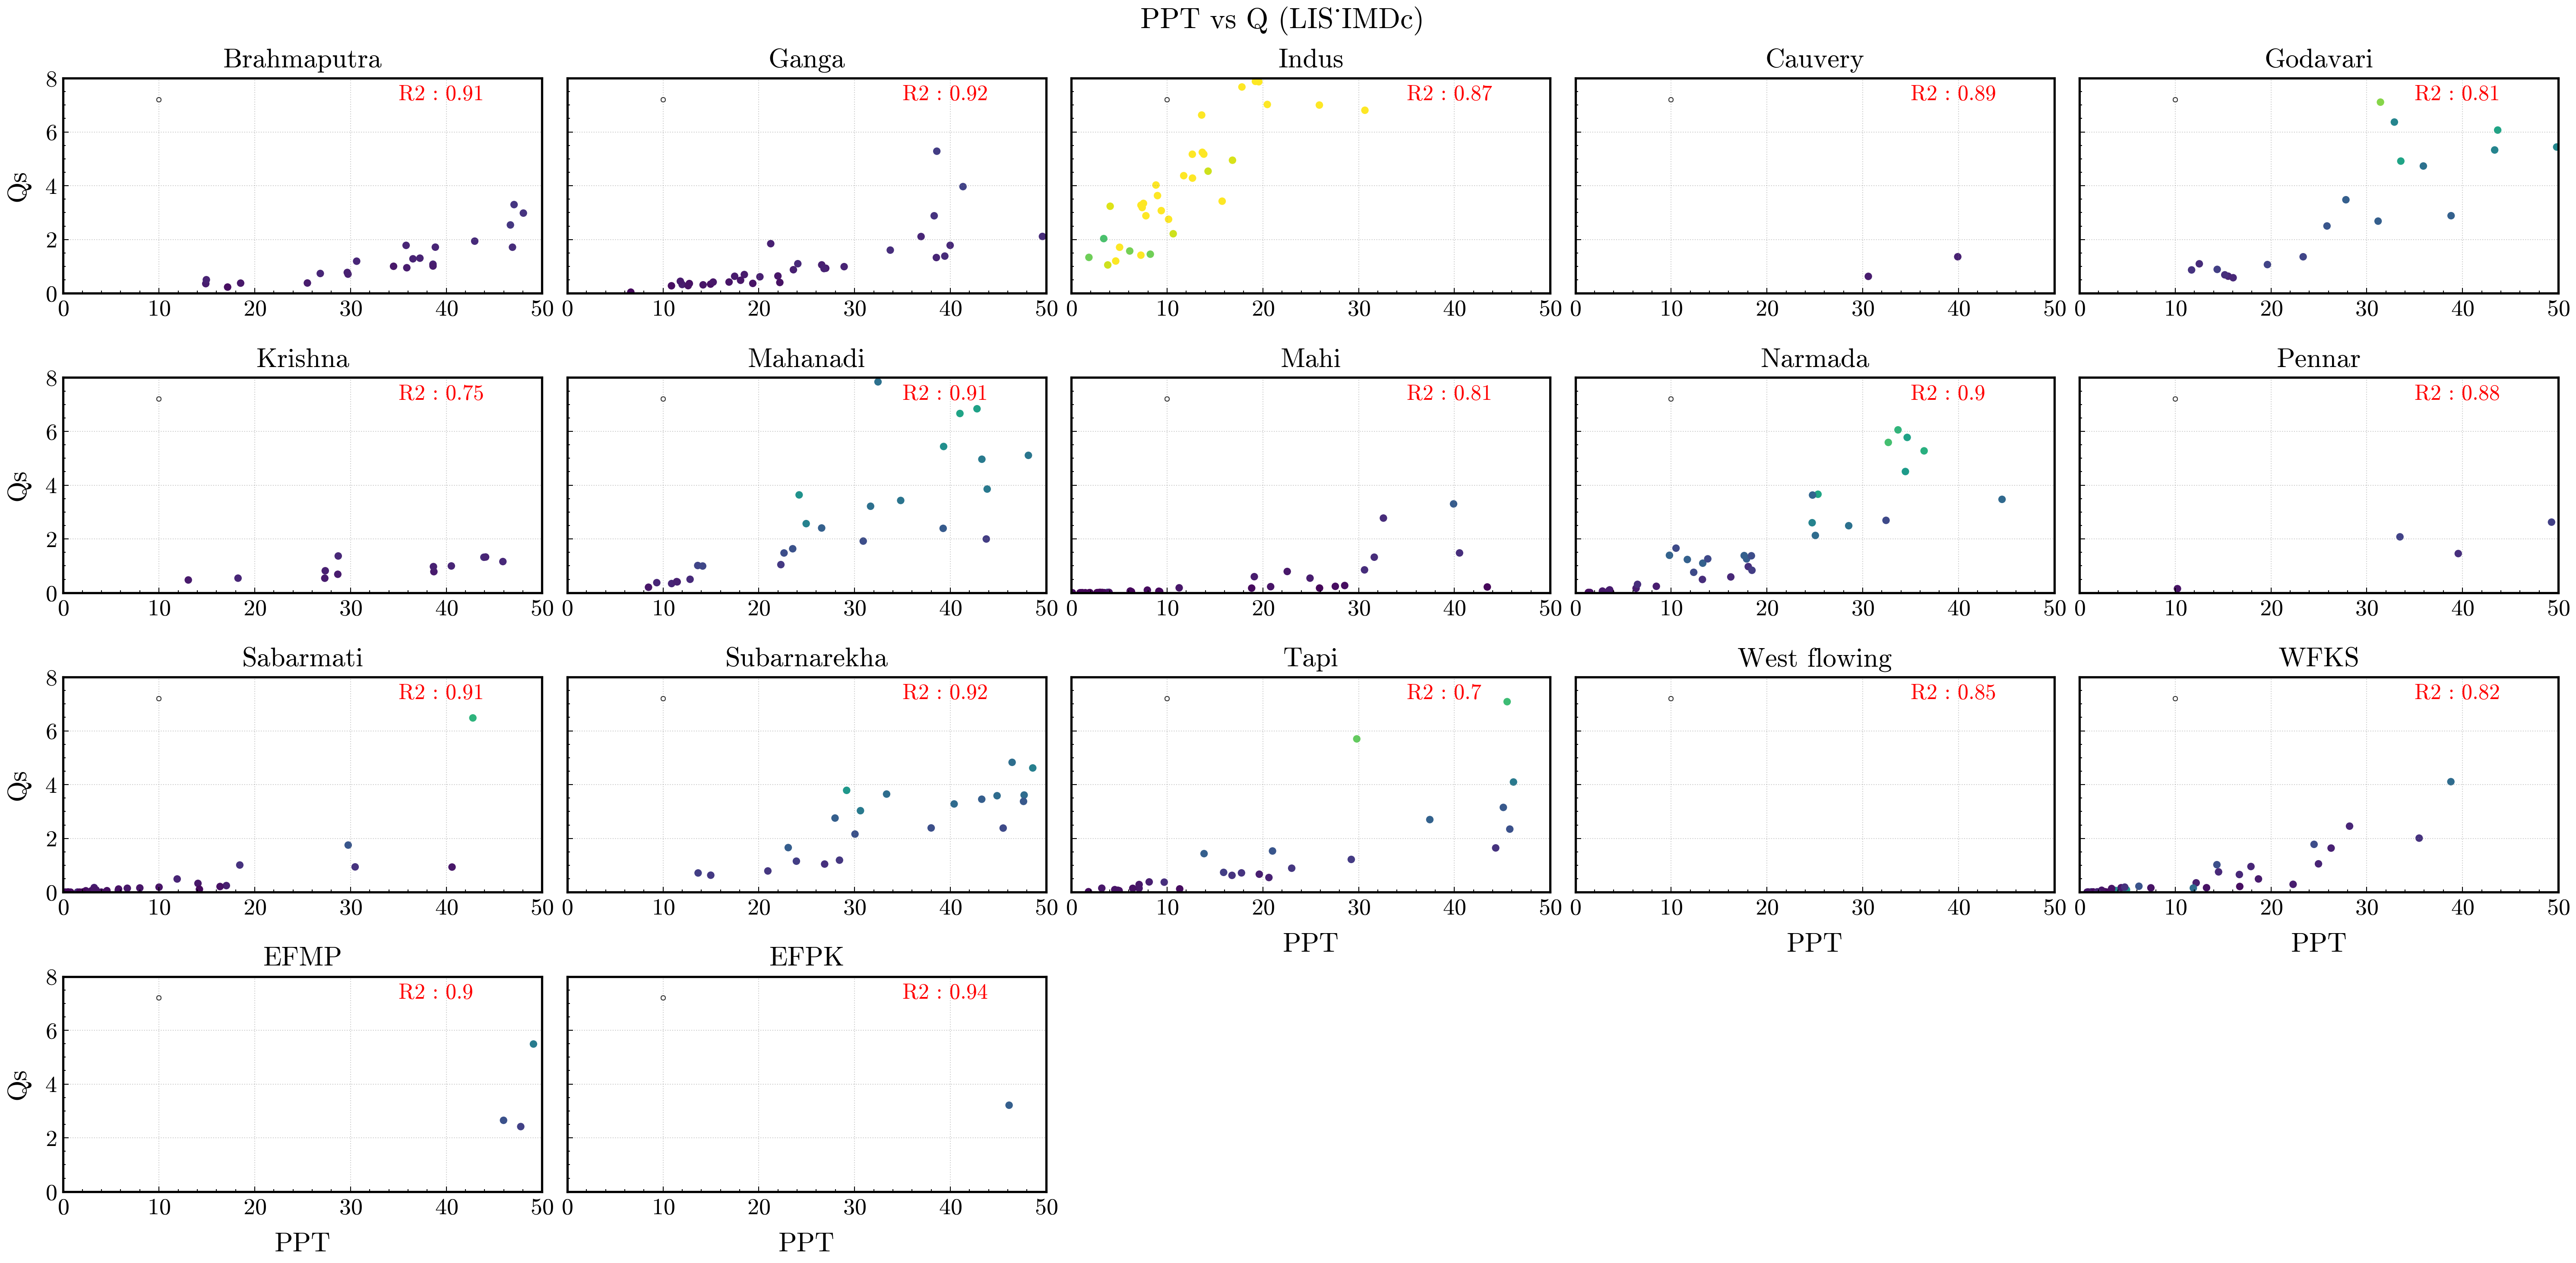

In [85]:
import matplotlib.ticker as ticker
mdl=4
ss=2
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]
lsm = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=lsm.region.values


fig, ax = plt.subplots(4,5,figsize=(20,10), facecolor='white', dpi=300,sharey=True)
ax=ax.flatten()


var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
var1=['PPT','ET','Qs','RE','RE_clean']
ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']


for i in range(17):
        
    import scienceplots
    plt.style.use(['science','no-latex','bright'])

    ppt=lsm['TotalPrecip_tavg'].isel(region=i,season=ss)
    q=lsm['Qs_tavg'].isel(region=i,season=ss)

    [x.set_linewidth(1.25) for x in ax[i].spines.values()]
    ax[i].grid(True, color= 'grey', alpha=0.4, linestyle='dotted')
 
    
    ax[i].scatter(ppt, q, c=lsm['RE_cleaned'].isel(region=i,season=ss), cmap='viridis',vmin=0, vmax=0.2, alpha=1, s=10)

    ax[i].set_xlim(0,50)
    ax[i].set_ylim(0,8)


    #ax[i].set_xticklabels([]);ax[2].set_xlabel('i')

    [ax[i].set_ylabel('Qs',fontsize=15,labelpad=8, weight='bold') for i in [0,5,10,15]]
    [ax[i].set_xlabel('PPT',fontsize=15,labelpad=8, weight='bold') for i in [12,13,14,15,16,17]]

    #[ax[i].set_xticklabels(ax[i].get_xticks(), fontsize=12) for i in  [12,13,14,15,16,17]]
    #[ax[i].set_yticklabels(ax[i].get_yticks(), fontsize=12) for i in [0,5,10,15]]


    ax[i].xaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=13) 
    ax[i].yaxis.set_tick_params(which='both', left=True, right=False,labelsize=13) 
    
    ax[i].text(0.7, 0.97,f"R2 : {np.corrcoef(ppt,q)[0,1].round(2)} ", fontsize=12, color='red',
         ha='left', va='top', transform=ax[i].transAxes)
    
    
    ax[i].set_title(f'{basin[i]}', fontsize=15,weight='bold')
    
    lgnd=ax[i].legend(loc='center', ncol=2,fontsize=6, bbox_to_anchor=(0.2, 0.90),frameon=True, borderpad=0.2, edgecolor='black')
    frame = lgnd.get_frame()
    frame.set_linewidth(0.5)
    fig.suptitle(f'PPT vs Q ({model[mdl]})', fontsize=16,fontweight='bold')


[ax[i].axis('off') for i in range(17, 20)]

plt.tight_layout()
plt.savefig(f'1_Preliminary checks/output/3_PQcurve/PQ_ssn_re{model[mdl]}.png',dpi=300)
plt.show()

### 2.2 RE 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

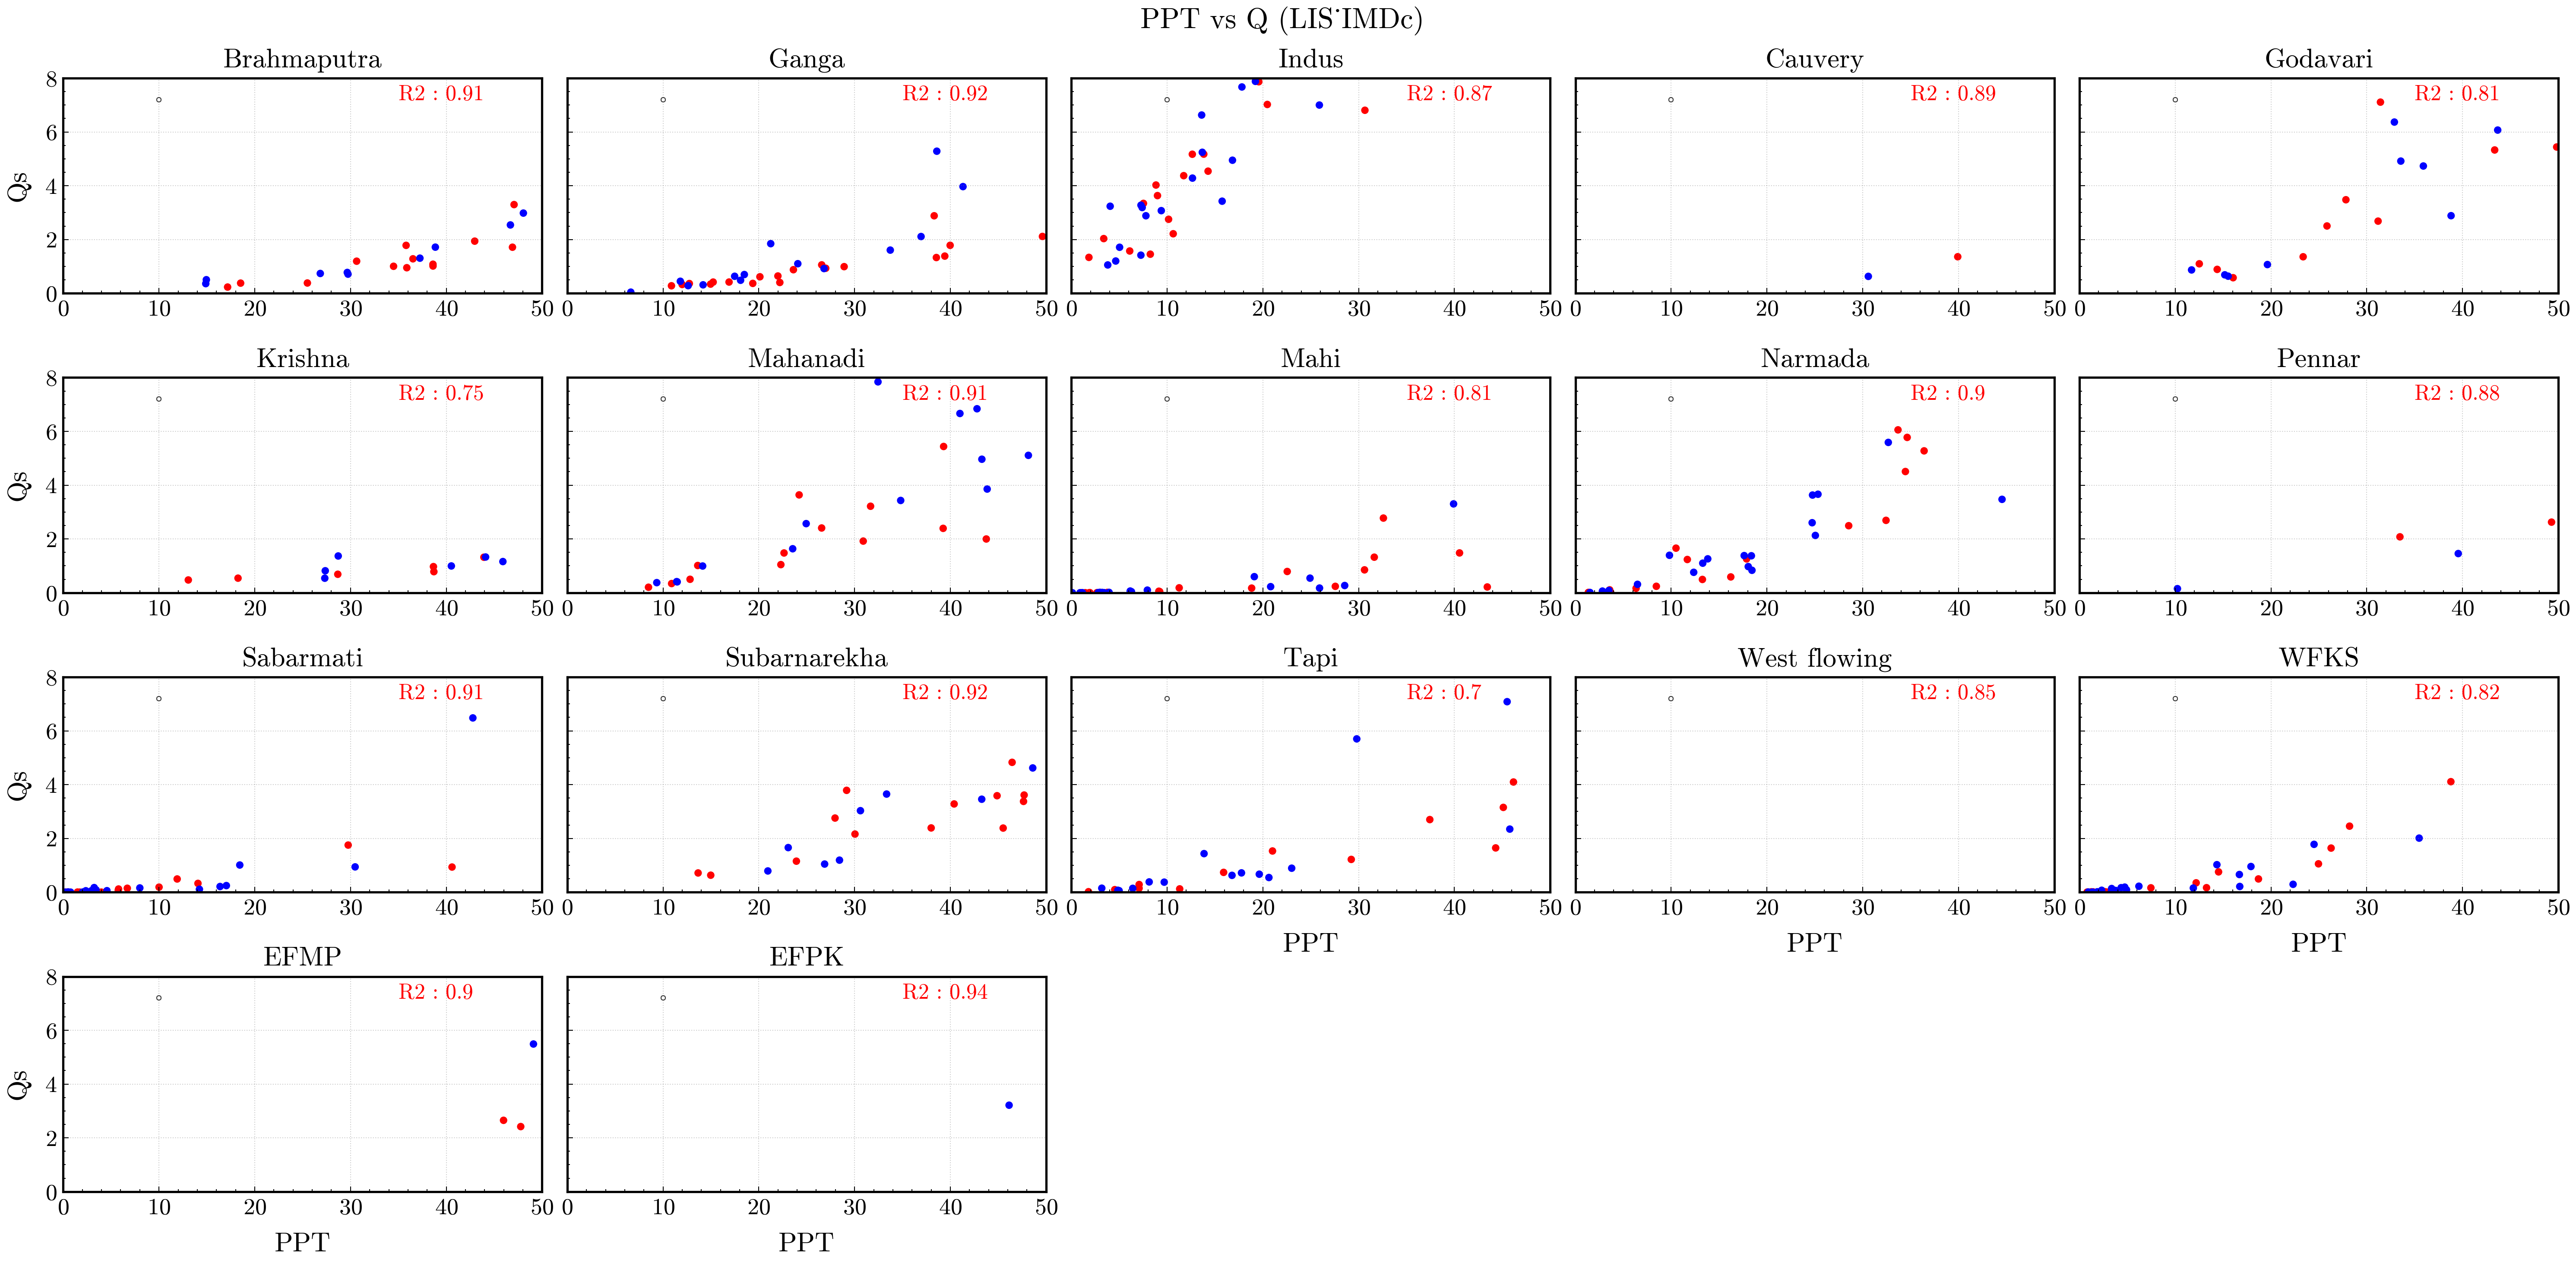

In [86]:
import matplotlib.ticker as ticker
mdl=4
ss=2
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]
lsm = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=lsm.region.values


fig, ax = plt.subplots(4,5,figsize=(20,10), facecolor='white', dpi=300,sharey=True)
ax=ax.flatten()


var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
var1=['PPT','ET','Qs','RE','RE_clean']
ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']


for i in range(17):
        
    import scienceplots
    plt.style.use(['science','no-latex','bright'])

    ppt=lsm['TotalPrecip_tavg'].isel(region=i,season=ss)
    q=lsm['Qs_tavg'].isel(region=i,season=ss)
    shift=np.where((lsm["year"].values>2000),"blue","red")

    [x.set_linewidth(1.25) for x in ax[i].spines.values()]
    ax[i].grid(True, color= 'grey', alpha=0.4, linestyle='dotted')
 
    
    ax[i].scatter(ppt, q, c=shift, alpha=1, s=10)

    ax[i].set_xlim(0,50)
    ax[i].set_ylim(0,8)


    #ax[i].set_xticklabels([]);ax[2].set_xlabel('i')

    [ax[i].set_ylabel('Qs',fontsize=15,labelpad=8, weight='bold') for i in [0,5,10,15]]
    [ax[i].set_xlabel('PPT',fontsize=15,labelpad=8, weight='bold') for i in [12,13,14,15,16,17]]

    #[ax[i].set_xticklabels(ax[i].get_xticks(), fontsize=12) for i in  [12,13,14,15,16,17]]
    #[ax[i].set_yticklabels(ax[i].get_yticks(), fontsize=12) for i in [0,5,10,15]]


    ax[i].xaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=13) 
    ax[i].yaxis.set_tick_params(which='both', left=True, right=False,labelsize=13) 
    
    ax[i].text(0.7, 0.97,f"R2 : {np.corrcoef(ppt,q)[0,1].round(2)} ", fontsize=12, color='red',
         ha='left', va='top', transform=ax[i].transAxes)
    
    
    ax[i].set_title(f'{basin[i]}', fontsize=15,weight='bold')
    
    lgnd=ax[i].legend(loc='center', ncol=2,fontsize=6, bbox_to_anchor=(0.2, 0.90),frameon=True, borderpad=0.2, edgecolor='black')
    frame = lgnd.get_frame()
    frame.set_linewidth(0.5)
    fig.suptitle(f'PPT vs Q ({model[mdl]})', fontsize=16,fontweight='bold')


[ax[i].axis('off') for i in range(17, 20)]

plt.tight_layout()
plt.savefig(f'1_Preliminary checks/output/3_PQcurve/PQCURVE_ssn{model[mdl]}.png',dpi=300)
plt.show()




